This notebook re-runs part of the experiments in the tutorial https://jmetzen.github.io/2015-11-27/vae.html

In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from simple_fc import Encoder, Decoder
from vae import Variational_Autoencoder

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
tf.reset_default_graph()

In [7]:
sess = tf.InteractiveSession()
build_encoder = Encoder(100)
build_decoder = Decoder(100)
model = Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,z_dim = 20,img_dim = 784,dataset = 'mnist',
                              learning_rate = 0.001, num_epochs = 10)
model.train()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch 1 loss: 193.787877558
Epoch 2 loss: 143.589021606
Epoch 3 loss: 130.534993023
Epoch 4 loss: 124.12649482
Epoch 5 loss: 120.313238664
Epoch 6 loss: 117.73710477
Epoch 7 loss: 115.80074603
Epoch 8 loss: 114.358322574
Epoch 9 loss: 113.254187414
Epoch 10 loss: 112.267270702


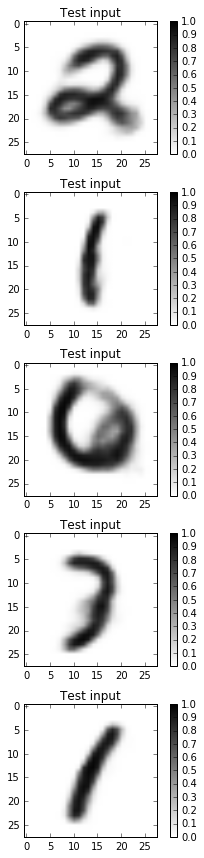

In [2]:
sess = tf.InteractiveSession()
build_encoder = Encoder(500)
build_decoder = Decoder(500)
model = Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,z_dim = 20,img_dim = 784,dataset = 'mnist',
                              learning_rate = 0.001, num_epochs = 10, load=True, 
                            load_file = "checkpoints/fcvae_checkpoint_lr_0.000743280879724_hidden_dim_500_z_dim_20-29")  
generated_images = model.generate(10)
plt.figure(figsize=(8, 12))
for i in range(5):
    plt.subplot(5, 2, 2*i + 1) 
    #plt.imshow(generated_images[i].reshape(28, 28), vmin=0, vmax=1) # color
    plt.imshow(generated_images[i].reshape(28, 28), cmap = 'gray_r', vmin=0, vmax=1) # grayscale
    plt.title("Test input")
    plt.colorbar()  
plt.tight_layout()

In [3]:
sess.close()
tf.reset_default_graph()

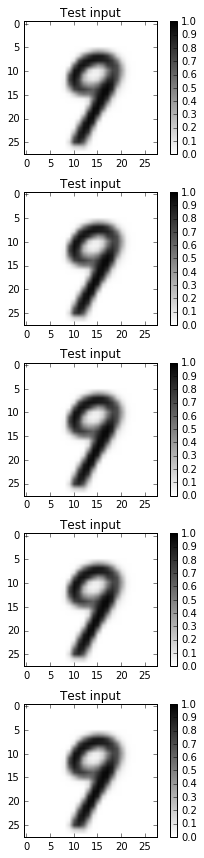

In [2]:
# Cheng's idea of averaging:
sess = tf.InteractiveSession()
build_encoder = Encoder(500)
build_decoder = Decoder(500)
model = Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,z_dim = 20,img_dim = 784,dataset = 'mnist',
                              learning_rate = 0.001, num_epochs = 10, load=True, 
                            load_file = "checkpoints/fcvae_checkpoint_lr_0.000743280879724_hidden_dim_500_z_dim_20-29")  
generated_images = model.generate(10,chengidea = True,cheng_perturb = 1e-10)

plt.figure(figsize=(8, 12))
for i in range(5):
    plt.subplot(5, 2, 2*i + 1) 
    #plt.imshow(generated_images[i].reshape(28, 28), vmin=0, vmax=1) # color
    plt.imshow(generated_images[i].reshape(28, 28), cmap = 'gray_r', vmin=0, vmax=1) # grayscale
    plt.title("Test input")
    plt.colorbar()  
plt.tight_layout()


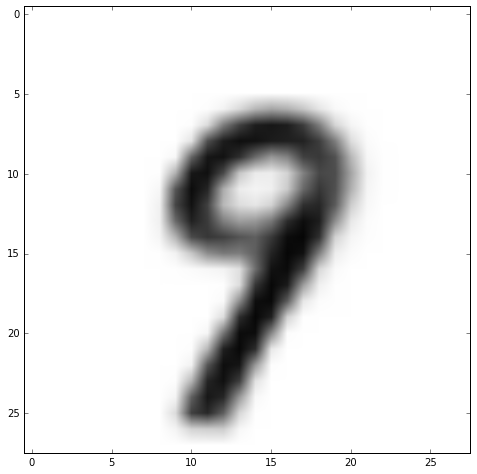

In [3]:
mean_image = np.mean(generated_images,axis = 0)
plt.figure(figsize=(8, 12)) 
plt.imshow(mean_image.reshape(28, 28), cmap = 'gray_r', vmin=0, vmax=1) # grayscale
plt.show()